Code to Import Files

In [ ]:
url_and_filenames = [
    ('https://drive.google.com/uc?id=1P2rO7bw_CCTPZFaPD8EJoANU9l0xw9qA', 'grey_1.png'),
    ('https://drive.google.com/uc?id=1J6wR3ROV6dmYLFKzs8RfOesAHP-pkosg', 'grey_2.png'),
    ('https://drive.google.com/uc?id=1fl2mKMFY3SPbDBY45N0mN3vuavfB31zl', 'grey_3.png'),
    ('https://drive.google.com/uc?id=1HEymhp0Fvq3ZAhS8Pi7uw0dd2AsxEza0', 'grey_4.png'),
]

for url, output_filename in url_and_filenames:
    !wget "{url}" -O "{output_filename}"

--2024-03-13 17:02:06--  https://drive.google.com/uc?id=1P2rO7bw_CCTPZFaPD8EJoANU9l0xw9qA
Resolving drive.google.com (drive.google.com)... 172.253.62.139, 172.253.62.113, 172.253.62.101, ...
Connecting to drive.google.com (drive.google.com)|172.253.62.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1P2rO7bw_CCTPZFaPD8EJoANU9l0xw9qA [following]
--2024-03-13 17:02:06--  https://drive.usercontent.google.com/download?id=1P2rO7bw_CCTPZFaPD8EJoANU9l0xw9qA
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.16.132, 2607:f8b0:4004:c17::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.16.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 188201 (184K) [image/png]
Saving to: ‘grey_1.png’

grey_1.png          100%[===================>] 183.79K  --.-KB/s    in 0.02s   

2024-03-13 17:02:07 (8.58 MB/s) - ‘grey_1.png’ save

Enter the name of the first image file:grey_1.png
Enter the name of the second image file:grey_2.png


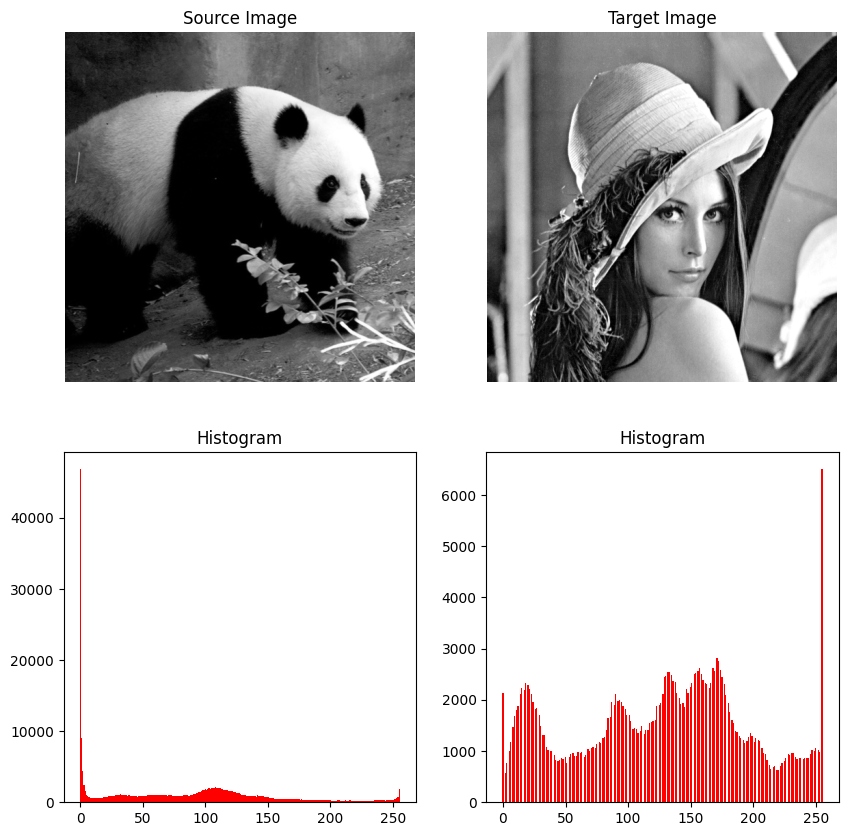

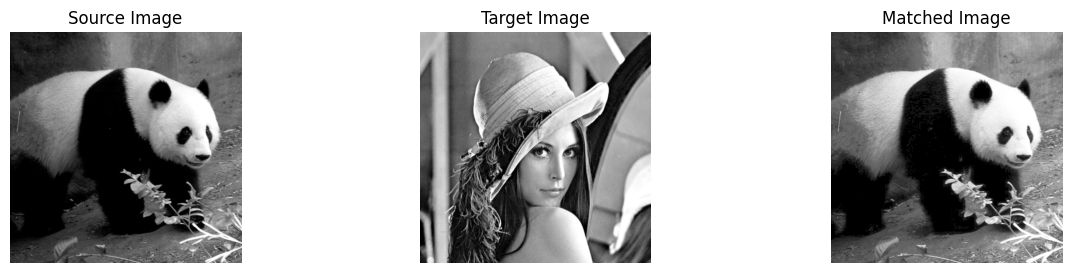

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def calculate_histogram(image, title, ax):
    ax[0].imshow(image, cmap='gray')
    ax[0].axis('off')
    ax[0].set_title(title)
    histogram = np.zeros(256)
    for i in image.ravel():
        histogram[i] += 1
    ax[1].bar(np.arange(256), histogram, width=1, color='red')
    ax[1].set_title('Histogram')

def histogram_matcher(source, target):
    source_hist = np.zeros(256)
    target_hist = np.zeros(256)
    for i in source.ravel():
        source_hist[i] += 1
    for i in target.ravel():
        target_hist[i] += 1
    source_cdf = np.cumsum(source_hist)*255/ source.size
    target_cdf = np.cumsum(target_hist)*255/ target.size
    matched_image = np.zeros_like(source)
    for i in range(256):
        closest_index = np.argmin(np.abs(source_cdf[i] - target_cdf))
        matched_image[source== i] = closest_index
    return matched_image

def plot_images(source, matched, target):
    fig, ax = plt.subplots(1, 3, figsize=(15, 3))
    ax[0].imshow(source, cmap='gray')
    ax[0].axis('off')
    ax[0].set_title('Source Image')
    ax[2].imshow(matched, cmap='gray')
    ax[2].axis('off')
    ax[2].set_title('Matched Image')
    ax[1].imshow(target, cmap='gray')
    ax[1].axis('off')
    ax[1].set_title('Target Image')
    plt.show()

name1 = input("Enter the name of the first image file:")
name2 = input("Enter the name of the second image file:")
source_image = cv2.imread(name1, cv2.IMREAD_GRAYSCALE)
target_image = cv2.imread(name2, cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
calculate_histogram(source_image, "Source Image", ax[:, 0])
calculate_histogram(target_image, "Target Image", ax[:, 1])
plt.show()

matched_image = histogram_matcher(source_image, target_image)
plot_images(source_image, matched_image, target_image)


Enter the name of the first image file:grey_4.png
Enter the name of the second image file:grey_3.png


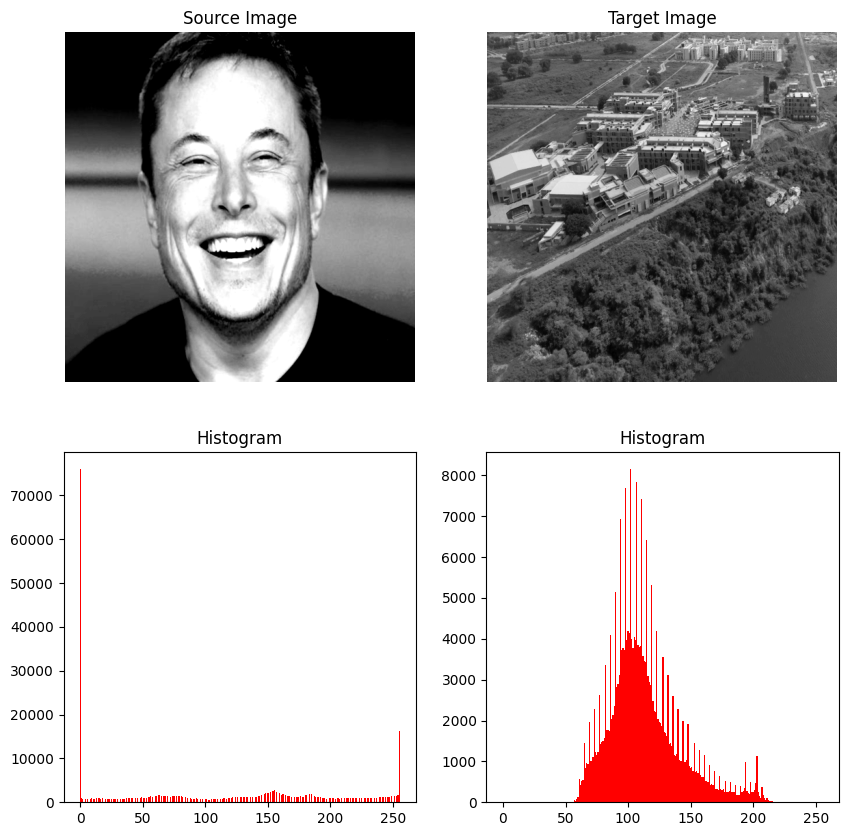

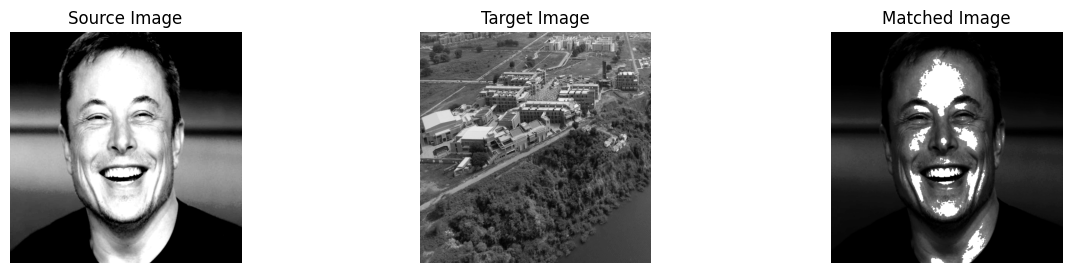

In [ ]:
# @title
import numpy as np
import cv2
import matplotlib.pyplot as plt

def calculate_histogram(image, title, ax):
    ax[0].imshow(image, cmap='gray')
    ax[0].axis('off')
    ax[0].set_title(title)
    histogram = np.zeros(256)
    for i in image.ravel():
        histogram[i] += 1
    ax[1].bar(np.arange(256), histogram, width=1, color='red')
    ax[1].set_title('Histogram')

def histogram_matcher(source, target):
    source_hist = np.zeros(256)
    target_hist = np.zeros(256)
    for i in source.ravel():
        source_hist[i] += 1
    for i in target.ravel():
        target_hist[i] += 1
    source_cdf = np.cumsum(source_hist)*255/ source.size
    target_cdf = np.cumsum(target_hist)*255/ target.size
    matched_image = np.zeros_like(source)
    for i in range(256):
        closest_index = np.argmin(np.abs(source_cdf[i] - target_cdf))
        matched_image[source == i] = closest_index
    return matched_image

def plot_images(source, matched, target):
    fig, ax = plt.subplots(1, 3, figsize=(15, 3))
    ax[0].imshow(source, cmap='gray')
    ax[0].axis('off')
    ax[0].set_title('Source Image')
    ax[2].imshow(matched, cmap='gray')
    ax[2].axis('off')
    ax[2].set_title('Matched Image')
    ax[1].imshow(target, cmap='gray')
    ax[1].axis('off')
    ax[1].set_title('Target Image')
    plt.show()

name1 = input("Enter the name of the first image file:")
name2 = input("Enter the name of the second image file:")
source_image = cv2.imread(name1, cv2.IMREAD_GRAYSCALE)
target_image = cv2.imread(name2, cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
calculate_histogram(source_image, "Source Image", ax[:, 0])
calculate_histogram(target_image, "Target Image", ax[:, 1])
plt.show()

matched_image = histogram_matcher(source_image, target_image)
plot_images(source_image, matched_image, target_image)

Enter the name of the first image file:grey_2.png
Enter the name of the second image file:grey_4.png


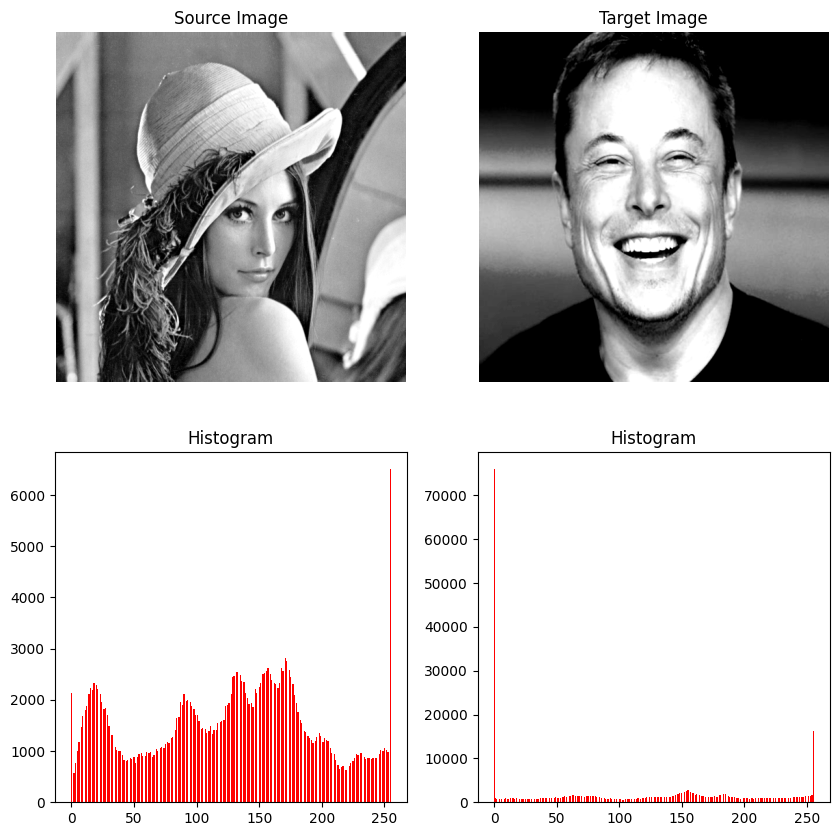

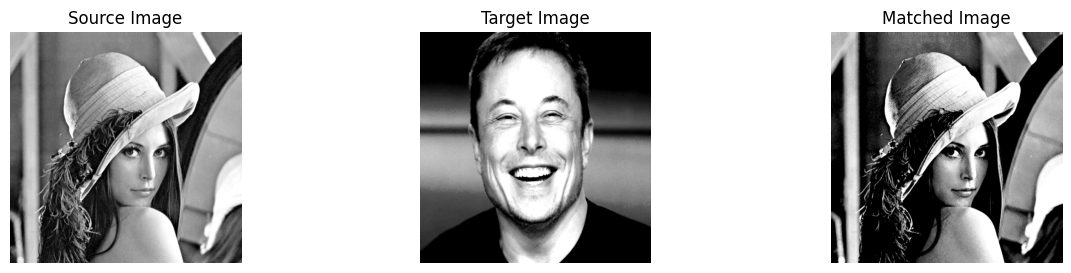

In [ ]:
# @title
import numpy as np
import cv2
import matplotlib.pyplot as plt

def calculate_histogram(image, title, ax):
    ax[0].imshow(image, cmap='gray')
    ax[0].axis('off')
    ax[0].set_title(title)
    histogram = np.zeros(256)
    for i in image.ravel():
        histogram[i] += 1
    ax[1].bar(np.arange(256), histogram, width=1, color='red')
    ax[1].set_title('Histogram')

def histogram_matcher(source, target):
    source_hist = np.zeros(256)
    target_hist = np.zeros(256)
    for i in source.ravel():
        source_hist[i] += 1
    for i in target.ravel():
        target_hist[i] += 1
    source_cdf = np.cumsum(source_hist)*255/ source.size
    target_cdf = np.cumsum(target_hist)*255/ target.size
    matched_image = np.zeros_like(source)
    for i in range(256):
        closest_index = np.argmin(np.abs(source_cdf[i] - target_cdf))
        matched_image[source == i] = closest_index
    return matched_image

def plot_images(source, matched, target):
    fig, ax = plt.subplots(1, 3, figsize=(15, 3))
    ax[0].imshow(source, cmap='gray')
    ax[0].axis('off')
    ax[0].set_title('Source Image')
    ax[2].imshow(matched, cmap='gray')
    ax[2].axis('off')
    ax[2].set_title('Matched Image')
    ax[1].imshow(target, cmap='gray')
    ax[1].axis('off')
    ax[1].set_title('Target Image')
    plt.show()

name1 = input("Enter the name of the first image file:")
name2 = input("Enter the name of the second image file:")
source_image = cv2.imread(name1, cv2.IMREAD_GRAYSCALE)
target_image = cv2.imread(name2, cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
calculate_histogram(source_image, "Source Image", ax[:, 0])
calculate_histogram(target_image, "Target Image", ax[:, 1])
plt.show()

matched_image = histogram_matcher(source_image, target_image)
plot_images(source_image, matched_image, target_image)

Enter the name of the first image file:grey_3.png
Enter the name of the second image file:grey_1.png


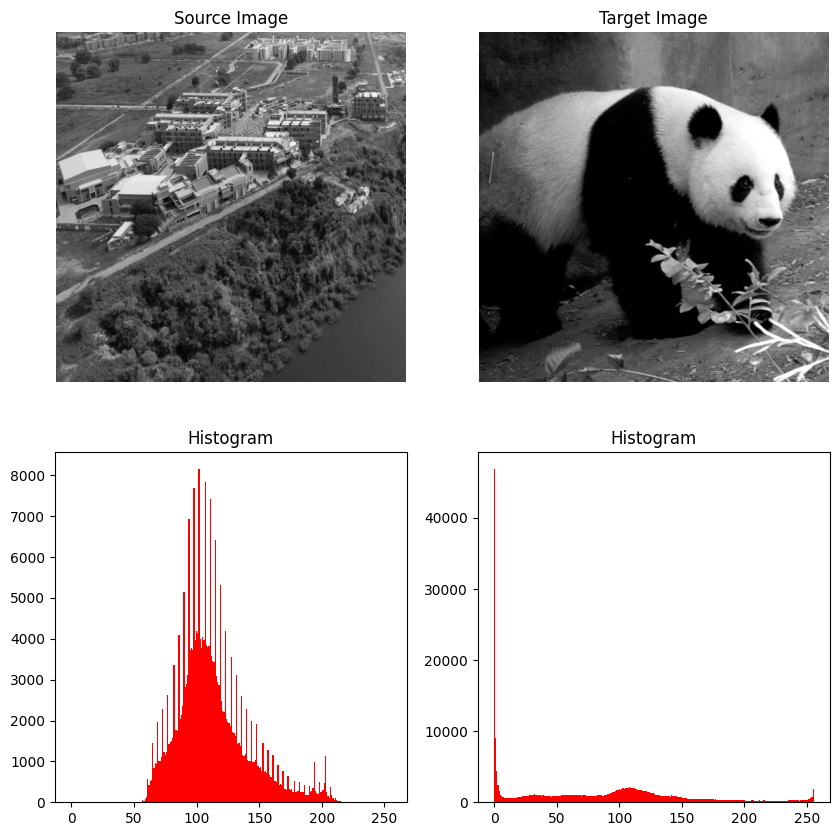

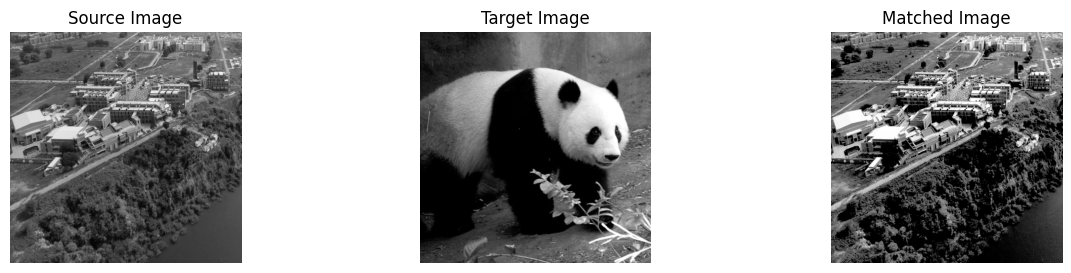

In [ ]:
# @title
import numpy as np
import cv2
import matplotlib.pyplot as plt

def calculate_histogram(image, title, ax):
    ax[0].imshow(image, cmap='gray')
    ax[0].axis('off')
    ax[0].set_title(title)
    histogram = np.zeros(256)
    for i in image.ravel():
        histogram[i] += 1
    ax[1].bar(np.arange(256), histogram, width=1, color='red')
    ax[1].set_title('Histogram')

def histogram_matcher(source, target):
    source_hist = np.zeros(256)
    target_hist = np.zeros(256)
    for i in source.ravel():
        source_hist[i] += 1
    for i in target.ravel():
        target_hist[i] += 1
    source_cdf = np.cumsum(source_hist)*255/ source.size
    target_cdf = np.cumsum(target_hist)*255/ target.size
    matched_image = np.zeros_like(source)
    for i in range(256):
        closest_index = np.argmin(np.abs(source_cdf[i] - target_cdf))
        matched_image[source == i] = closest_index
    return matched_image

def plot_images(source, matched, target):
    fig, ax = plt.subplots(1, 3, figsize=(15, 3))
    ax[0].imshow(source, cmap='gray')
    ax[0].axis('off')
    ax[0].set_title('Source Image')
    ax[2].imshow(matched, cmap='gray')
    ax[2].axis('off')
    ax[2].set_title('Matched Image')
    ax[1].imshow(target, cmap='gray')
    ax[1].axis('off')
    ax[1].set_title('Target Image')
    plt.show()

name1 = input("Enter the name of the first image file:")
name2 = input("Enter the name of the second image file:")
source_image = cv2.imread(name1, cv2.IMREAD_GRAYSCALE)
target_image = cv2.imread(name2, cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
calculate_histogram(source_image, "Source Image", ax[:, 0])
calculate_histogram(target_image, "Target Image", ax[:, 1])
plt.show()

matched_image = histogram_matcher(source_image, target_image)
plot_images(source_image, matched_image, target_image)

## Report

### Aim: To obtain a matched image from a source and a target image with the help of CDF Normalization and Histogram Matching.

#### 1. `calculate_histogram`:

This function is defined to plot The source image, target image and their respective histograms. We first show the image with imshow and the show its perticular histogram. We calculate the histogram in this by first making a list of 256 zeros and the replacing them with the pixels of that perticular intensity. Then we show its plot exactly below the image with the help of the ax variable defined.

#### 2. `histogram_matcher`:

This function is defined to calculate the CDF and then Normalize it and then finally return the matched image. We take the source and target image in for the function. Then we will used a similar method used in [1] to make the histogram fuction of the image. Then we calculate the Normalized CDF with this line.
```py
source_cdf = np.cumsum(source_hist)*255/source.size
```
Then we calculate the list which yould represent the matched image by rounding off and matching both of hese normalized CDFs
and then finally return the matched image.

#### 3. `plot_images`:

This function is to finally plot the source, target and matched image in a single line. We defined a [1x3] Martix and then placed the images in their perticulat position with the help of subplot and imshow.

#### 4. Input and using the functions:

We take input as a name of the file and then use cv2 to read this image and call in all the functions. We finally get the desired output in the form of source, target and matched image.

### Conclusion:

We were able to get a matched image with the help of cv2 function wich was obtained by doing CDF Normalization and histogam matching. We can clearly see the changes in the pixle intensity in the matched image.

###Sources and Refrences:


https://matplotlib.org/stable/index.html

https://docs.opencv.org/4.x/d1/db7/tutorial_py_histogram_begins.html

###Discussed With:

Aftab Surani 23110323

Jaskirat Singh Maskeen 23110146

Hassan Ali 23110133